In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# initial values
b = 0.0
i = 0.001
o = 0.0

In [10]:
# parameters
## O-decay
k = 0.85
## IO-lag
T = 2
state = [{"b": b, "i": i, "o": o}]*T

In [11]:
## IB-sigmoid
### https://www.desmos.com/calculator/htwayvkmsc
### <iframe src="https://www.desmos.com/calculator/jkkpiyy3nf?embed" width="500px" height="500px" style="border: 1px solid #ccc" frameborder=0></iframe>
### https://www.desmos.com/calculator/jkkpiyy3nf


In [12]:
scale = 10
shift = 0.25
# replication
replication = 1.5

In [13]:
# transition functions
def next_b(state, scale=scale, shift=shift):
  i = state[-1]["i"]
  return 1.0/(1.0 + np.exp(-1.0*scale*(np.tan(np.pi*(np.power(i,shift)) - np.pi/2))))

def next_i(state, R=replication):
  i = state[-1]["i"]
  o = state[-1]["o"]
  s = 1.0 - (i+o) # s + i + o = 1.0
  at_risk = s*(R-b)
  return at_risk*i

def next_o(state, decay=k):
  o = state[-1]["o"]
  ip = state[0]["i"]
  return min(k*o + ip, 1.0)


In [15]:
# calculate states
infections = []
behaviors = []
for t in range(100):
  next_vector = {"b": next_b(state), "i": next_i(state), "o": next_o(state)}
  state.append(next_vector)
  state = state[1:]
  if not t % 8:
    print(t, '\t', next_vector)
  infections.append(next_vector["i"])
  behaviors.append(next_vector["b"])


0 	 {'b': 0.18232763282590536, 'i': 0.042342239125195975, 'o': 0.28412258993810535}
8 	 {'b': 0.22057986966804996, 'i': 0.04482354561441622, 'o': 0.28944548615944304}
16 	 {'b': 0.19951486369750515, 'i': 0.04302174881611462, 'o': 0.2932076256008125}
24 	 {'b': 0.19531095106572036, 'i': 0.04311653500532812, 'o': 0.28737802258664225}
32 	 {'b': 0.20983516073425457, 'i': 0.04400806177151287, 'o': 0.2900066436483302}
40 	 {'b': 0.20057397151353906, 'i': 0.043251971336977314, 'o': 0.2910583803470931}
48 	 {'b': 0.20007135592579278, 'i': 0.043373124385165024, 'o': 0.2888126489675473}
56 	 {'b': 0.2054216392408454, 'i': 0.04368293067136131, 'o': 0.2900337881565757}
64 	 {'b': 0.20144554839111298, 'i': 0.04337222149813607, 'o': 0.2902723448287856}
72 	 {'b': 0.20172058014633537, 'i': 0.04345245501648078, 'o': 0.28942686162872033}
80 	 {'b': 0.20363449757672467, 'i': 0.04355567944983677, 'o': 0.28997041425155706}
88 	 {'b': 0.2019672474540723, 'i': 0.04343065063497028, 'o': 0.28999348678438686}

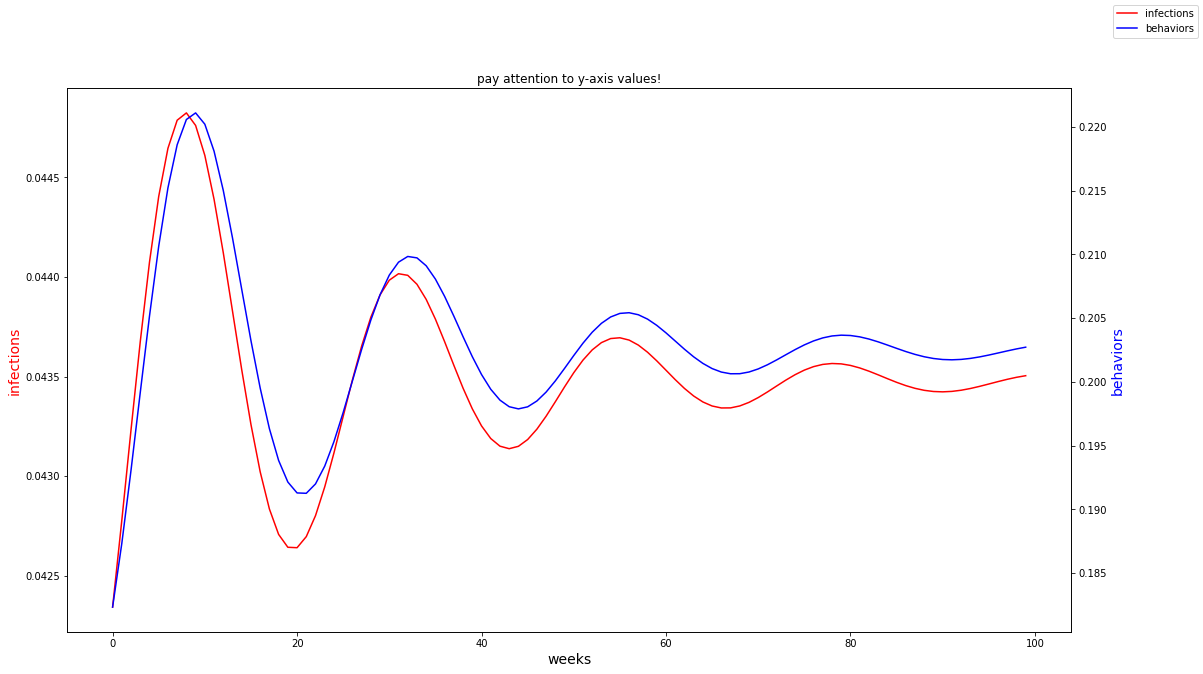

In [17]:
x = range(len(infections))
# fig = plt.figure()
# ax = fig.add_subplot(2, 1, 1)
#ax.set_ylim([0.0, 1.0])
#ax.set_yscale('log')

fig,ax = plt.subplots(figsize=(18,10))
ax.plot(x, infections, label='infections', color='red')
ax.set_ylabel("infections",color="red",fontsize=14)
ax.set_xlabel("weeks",fontsize=14)
ax2=ax.twinx()
ax2.plot(x, behaviors, label='behaviors', color='blue')
ax2.set_ylabel("behaviors",color="blue",fontsize=14)
fig.legend()
plt.title('pay attention to y-axis values!')
plt.savefig('timeseries.png', dpi=90)
plt.show()

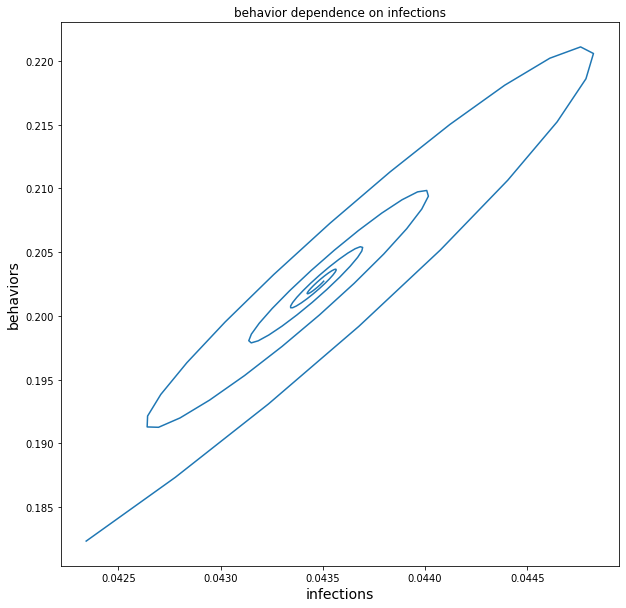

In [20]:
fig,ax=plt.subplots(figsize=(10,10))
ax.plot(infections, behaviors)
ax.set_xlabel("infections",fontsize=14)
ax.set_ylabel("behaviors",fontsize=14)
plt.title('behavior dependence on infections')
plt.savefig('behavior_against_infections.png', dpi=90)